In [11]:
install.packages('leaps')

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hewas\AppData\Local\Temp\RtmpKafX9F\downloaded_packages


In [12]:
library(ISLR)
library(dplyr)
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.3"

In [13]:
# Major League Baseball Data from the 1986 and 1987 seasons. 

summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

In [14]:
#?Hitters
clean.data <- na.omit(Hitters)


In [15]:
# best subset regression
library(leaps)


In [16]:
subset.fit <- regsubsets(Salary ~ ., clean.data, nvmax=19)

In [6]:
?regsubsets

In [17]:
summary(subset.fit)

Subset selection object
Call: regsubsets.formula(Salary ~ ., clean.data, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " 

In [18]:
names(summary(subset.fit))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

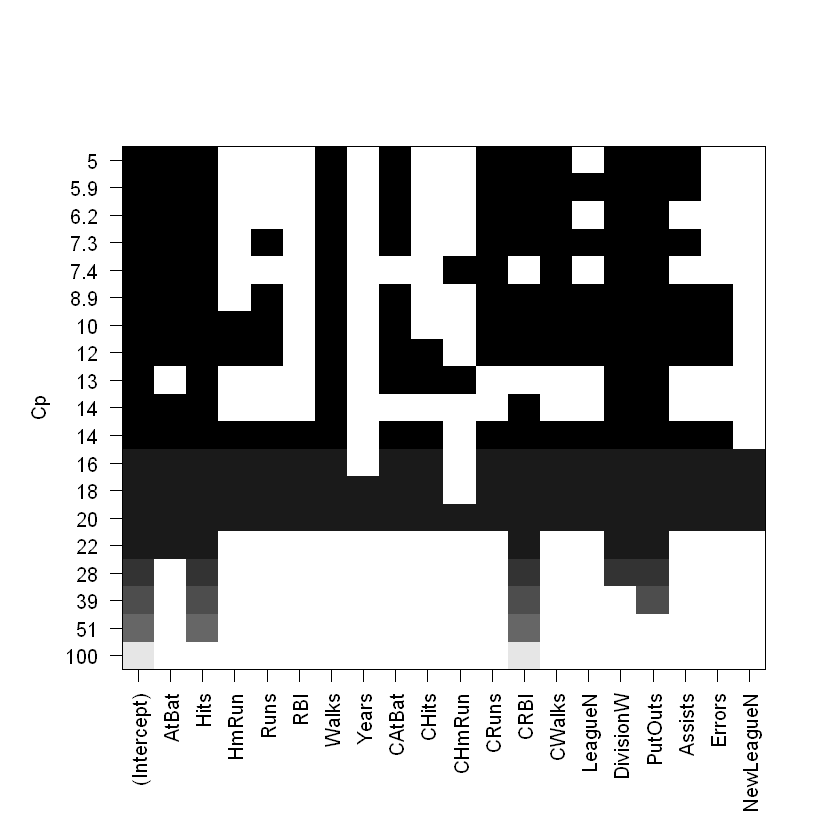

In [19]:
plot(subset.fit, scale='Cp')

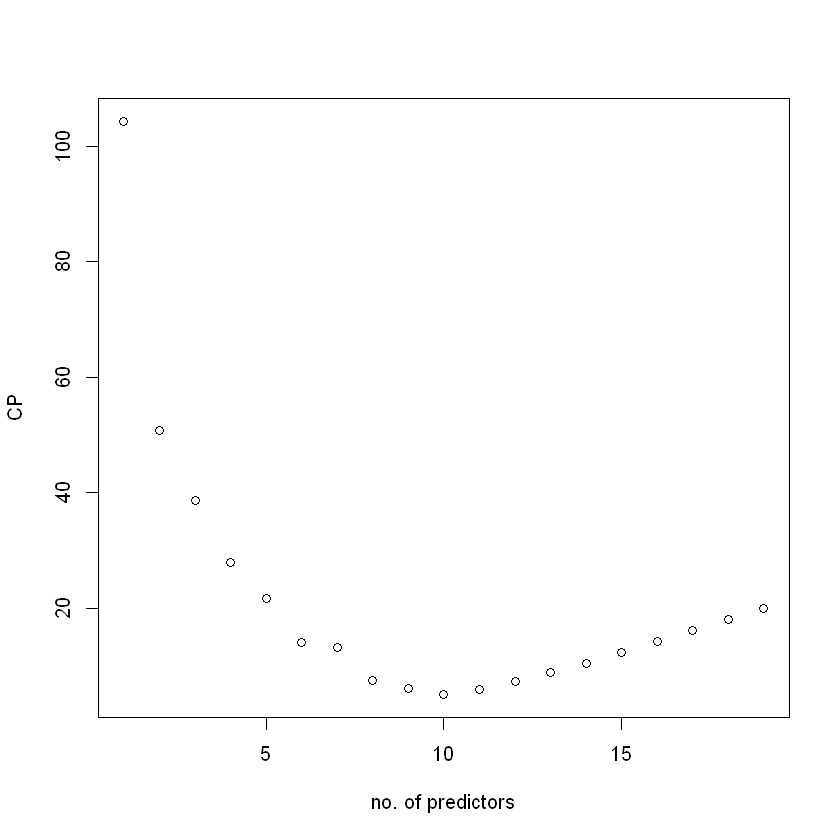

In [20]:
plot(summary(subset.fit)$cp, ylab='CP', xlab='no. of predictors')

In [26]:
coef(subset.fit, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

In [27]:
# foreward stepwise
#
# step()
# stepAIC # library(stats)
#

forward.fit <- regsubsets(Salary ~ ., clean.data, nvmax=19, method='forward')


In [28]:
summary(forward.fit)

Subset selection object
Call: regsubsets.formula(Salary ~ ., clean.data, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1

In [11]:
test.ind <- sample(nrow(clean.data), nrow(clean.data)/5)

[1]  49 153  74 228 146 122 263 128  47  24  71 100  89 165 110  20 154 114 111
[20] 131  41 251  27 164 229 223 109   5 212 162  92 104   3  58 225  42 254 158
[39]  43 143 150 230 136  36  68 214 259 237 233 197   4 178

In [12]:
test.data <- clean.data[test.ind,]
train.data <- clean.data[-test.ind,]



In [13]:
forward.fit <- regsubsets(Salary ~ ., train.data, nvmax=19, method='forward')

In [14]:
# predict test for all 19 forward models

test.mat <- model.matrix(Salary ~ .,data=test.data)
test.mat

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Bill Buckner,1,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,0,0,1067,157,14,0
-John Moses,1,399,102,3,56,34,34,5,670,167,4,89,48,54,0,1,211,9,3,0
-Willie Wilson,1,631,170,9,77,44,31,11,4908,1457,30,775,357,249,0,1,408,4,3,0
-Carney Lansford,1,591,168,19,80,72,39,9,4478,1307,113,634,563,319,0,1,67,147,4,0
-Pat Tabler,1,473,154,6,61,48,29,6,1966,566,29,250,252,178,0,0,846,84,9,0
-Tony Bernazard,1,562,169,17,88,73,53,8,3181,841,61,450,342,373,0,0,351,442,17,0
-Ron Cey,1,256,70,13,42,36,44,16,7058,1845,312,965,1128,990,1,0,41,118,8,0
-Herm Winningham,1,185,40,4,23,11,18,3,524,125,7,58,37,47,1,0,97,2,2,1
-Dave Concepcion,1,311,81,3,42,30,26,17,8247,2198,100,950,909,690,1,1,153,223,10,1
-Dave Parker,1,637,174,31,89,116,56,14,6727,2024,247,978,1093,495,1,1,278,9,9,1


In [15]:
mse.list = c()

for (i in 1:19) {
    this.coef <- coef(forward.fit, id=i)
    predictions <- test.mat[,names(this.coef)]%*%this.coef  #?'%*%' matrix multiplication
    mse.list <- c(mse.list, (mean((test.data$Salary - predictions)^2)))
}


In [16]:
mse.list

[1] 196076.5 198820.2 203100.9 192931.2 196351.1 184330.7 184775.4 181523.5
 [9] 175373.0 170458.4 170795.8 170568.9 171504.5 171336.3 171566.7 171220.1
[17] 171385.7 171093.0 171025.9

In [19]:
which.min(mse.list)
min(mse.list)==mse.list
which ( min(mse.list)==mse.list )

[1] 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] 10

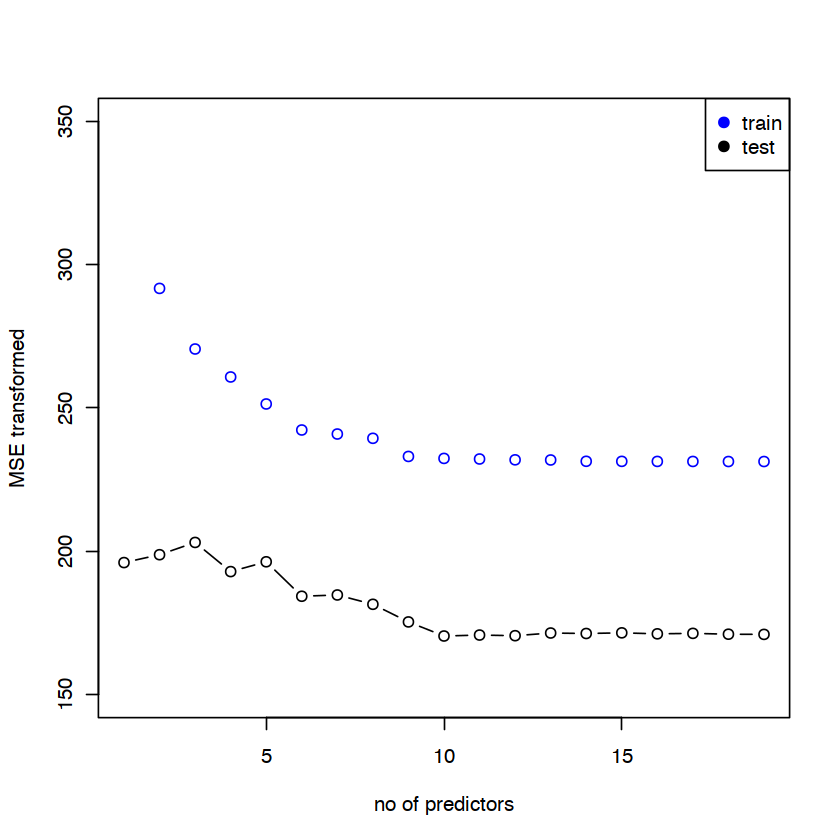

In [20]:
plot(mse.list/1000, type='b', ylab='MSE transformed', xlab='no of predictors', ylim=c(150,350))
points(forward.fit$rss[-1]/70000, col='blue')
legend('topright', legend=c('train','test'), col=c('blue', 'black'), pch=19)

In [125]:
predict.regsubsets <- function(object, newdata, id, ...){
 form <- as.formula(object$call [[2]])
 mat <- model.matrix(form,newdata)
 coefi <- coef(object, id=id)
 xvars <- names(coefi)
 mat[,xvars]%*%coefi
}



In [126]:
# use 10-fold cross-validation

In [21]:
# new use of "sample()"
indices <- rep(1:10, length=nrow(clean.data))
folds <- sample(indices)

In [136]:
folds

[1] 10  4  2  8  1  2  5  9  2  8  9  5 10  2  3  8  2  3  7  9  6  1 10  1 10
 [26] 10  8  5  7 10  1  4  7  4  4  5  3  8  9  9  8  2  6  8  7 10 10  1 10  6
 [51]  8  5 10  9  3  6  3 10  1  6  7  4  5  4  1  7  2  2  7  3  9  4  9  2  1
 [76]  1  2  7  3  4  5  9  9  8  8  2  7  7  5  3  7  3  5  6  6  8  4  5  1  7
[101]  2  7  6  6  9  7  5  6  7 10 10  5  2  3  9  3 10  1  2  1  9  1  9  6  4
[126]  3  4  1  9 10  1  5  4  4  3  6  2  2  6  6  1  7  1  8  5  8  7  9  9  5
[151]  2  3  2  3  9  8  4  9  3  7  9  2  9  7  3  8 10  5  6  8  1  5  1 10  9
[176]  4  8  3  8  6  4  5  7  5 10  6  8  8  8  2  7 10  8  9  6  2  1  9  6  9
[201]  5  3  3  1  2  6  3  9  6  3  2  8 10  4  5  3  4  4  1 10  8  4  6  1  2
[226] 10  2  4  3  4  7  3  6  6  1  8 10  7  5  7  1  2  3 10  1 10  3  5  7  4
[251]  4  6  6  4  5  4  2  1  8  7 10  5  5

In [138]:
table(folds)

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

In [24]:
cv.errors <- matrix(NA,10,19, dimnames=list(NULL, paste(1:19)))
cv.errors

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [25]:
for(j in 1:10){
    best.fit = regsubsets(Salary ~. , data = clean.data[folds != j,] , nvmax=19)
    for(i in 1:19){
    pred <- predict(best.fit, clean.data[folds==j,],id=i)  ## <- !! uses our predict.regsubsets()
    cv.errors[j,i] <- mean( (clean.data$Salary[folds==j]-pred)^2)
    } 
}

ERROR: Error in UseMethod("predict"): nicht anwendbare Methode für 'predict' auf Objekt der Klasse "regsubsets" angewendet


In [144]:
mean.cv.errors=apply(cv.errors ,2,mean)

In [145]:
mean.cv.errors

1        2        3        4        5        6        7        8 
151617.9 128164.8 135710.9 142212.0 138860.7 125909.4 126217.3 115233.6 
       9       10       11       12       13       14       15       16 
116491.9 112548.6 113809.9 115138.6 116745.1 116385.8 116780.2 117024.1 
      17       18       19 
116882.6 117261.2 117089.6

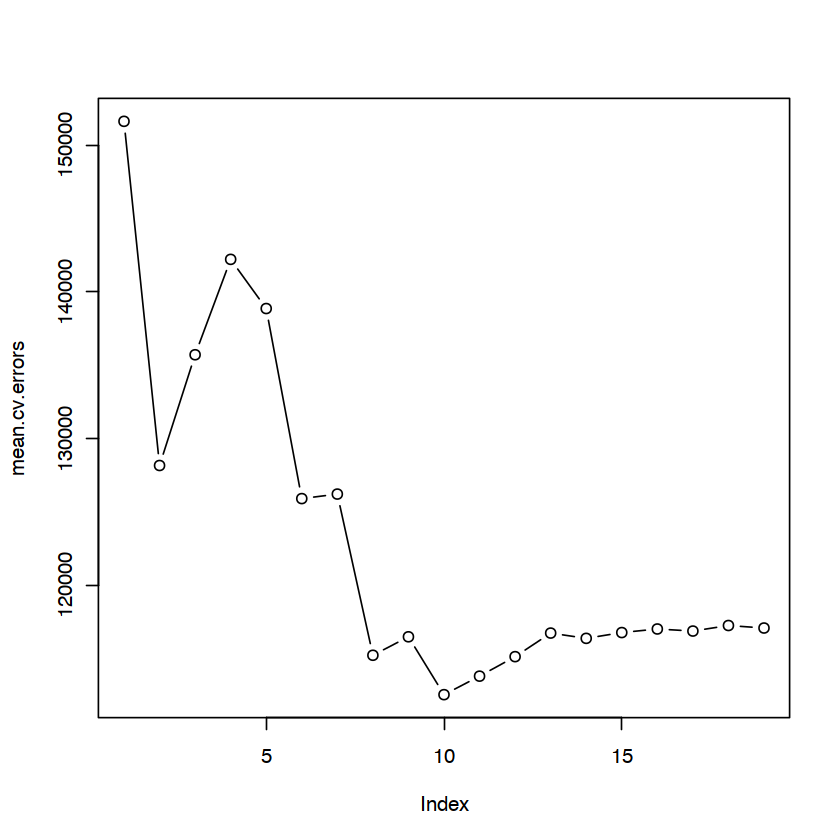

In [147]:
par(mfrow=c(1,1))
plot(mean.cv.errors, type='b')

In [149]:
library(glmnet)

Warning message:
“package ‘glmnet’ was built under R version 4.0.2”
Loading required package: Matrix

Loaded glmnet 4.0-2



In [ ]:
glmnet(predictors, response, alpha=0)  # for ridge
glmnet(predictors, response, alpha=1)  # for lasso

predictors <- model.matrix(...)
